<a href="https://colab.research.google.com/github/YuniGoldenBoY30/hackathon/blob/main/HackaThon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Descargar y descomprimir el conjunto de datos
!wget https://share.natasquad.com/index.php/s/D2BHJSt5nY3idPd/download/archive.zip
!unzip archive.zip

# Directorio del conjunto de datos de entrenamiento
train_data_dir = '/content/dataset/Train'

# Directorio del conjunto de datos de prueba
test_data_dir = '/content/dataset/Test'

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_5372.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_54.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6186.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6285.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6551.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6565.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6985.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_7173.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_7306.jpg  
  inflating: dataset/Train/rottencapsicum

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accurancy')>'0.98'):
      print ("\n Alcanzó 98% de precisión. Deteniendo entrenamiento ..")
      self.model.stop_training= True

callbacks = myCallback()

In [ ]:
#Variante modelo pre entrenado

# Cargar la base de datos de ImageNet pre-entrenada
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas de la base de datos pre-entrenada
for layer in vgg16_model.layers:
    layer.trainable = False

# Agregar capas personalizadas al modelo
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Crear generadores de datos para el conjunto de entrenamiento y el conjunto de validación
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')




Found 23619 images belonging to 18 classes.
Found 6738 images belonging to 14 classes.


In [ ]:
#Variante CNN sequancial propia
# Entrenar el modelo
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Crear generadores de datos para el conjunto de entrenamiento y el conjunto de validación
# train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalizar los valores de píxeles
    rotation_range=20, # Rotación aleatoria de la imagen en el rango de 20 grados
    width_shift_range=0.2, # Desplazamiento horizontal aleatorio de la imagen en el rango del 20% del ancho de la imagen
    height_shift_range=0.2, # Desplazamiento vertical aleatorio de la imagen en el rango del 20% de la altura de la imagen
    shear_range=0.2, # Cizallamiento aleatorio de la imagen en el rango del 20%
    zoom_range=0.2, # Zoom aleatorio de la imagen en el rango del 20%
    horizontal_flip=True, # Volteo horizontal aleatorio de la imagen
    fill_mode='nearest' # Relleno de los píxeles faltantes con los píxeles más cercanos
)


train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(100, 100), batch_size=32, class_mode='categorical')


Found 23619 images belonging to 18 classes.


In [ ]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
     callbacks=[callbacks]
)

# Predecir sobre el conjunto de prueba
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(100, 100), batch_size=1, shuffle=False)
y_pred = model.predict(test_generator, steps=len(test_generator))


Epoch 1/10
739/739 [==============================] - 12776s 17s/step - loss: 1.0917 - accuracy: 0.6292
Epoch 2/10
187/739 [======>.......................] - ETA: 2:34:42 - loss: 0.7059 - accuracy: 0.7405

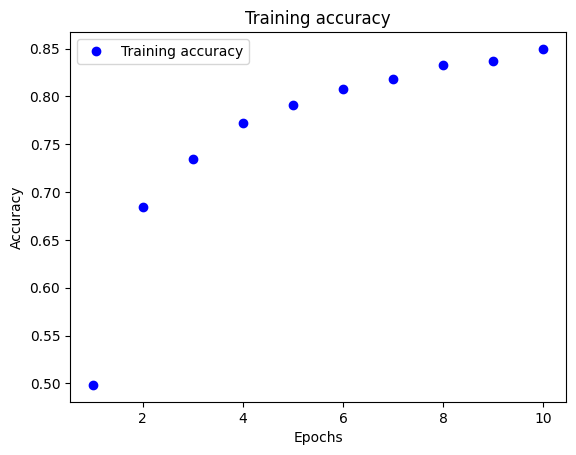

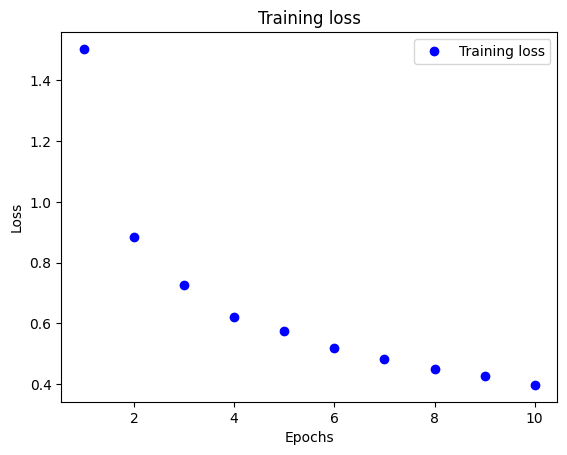

In [ ]:
import matplotlib.pyplot as plt

# Visualización de la precisión y la pérdida de entrenamiento y validación
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

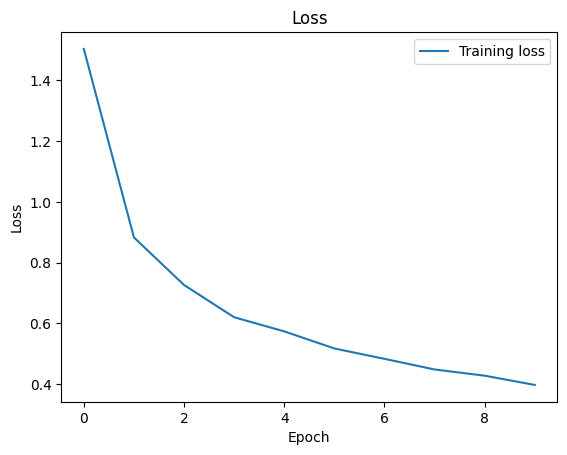

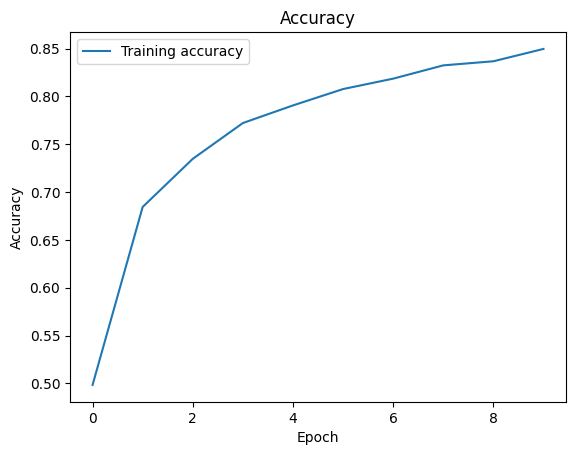

In [ ]:
# Obtener la pérdida y la precisión del entrenamiento y la validación
train_loss = history.history['loss']
# val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# Graficar la pérdida
plt.plot(train_loss, label='Training loss')
# plt.plot(val_loss, label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar la precisión
plt.plot(train_acc, label='Training accuracy')
# plt.plot(val_acc, label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()